# БАНКОВСКИЙ КЕЙС

# Приводим столбцы к стилю camel case, преобразуем типы данных, находим и удаляем/заменям дубли и пропуски

In [ ]:
import pandas as pd

# Загрузка данных
bank_clients_transactions_df = pd.read_csv('/content/bank_clients_transactions.csv')

# --- ПРОВЕРКА: Выводим текущие названия столбцов ---
print("🔹 Исходные названия столбцов:")
print(bank_clients_transactions_df.columns.tolist())

# --- 1. Приведение названий столбцов к camelCase (безопасно) ---
def to_camel_case(snake_str):
    components = snake_str.split('_')
    return components[0].lower() + ''.join(x.title() for x in components[1:])

# Создаём словарь переименования только для тех столбцов, которые содержат '_'
rename_dict = {}
for col in bank_clients_transactions_df.columns:
    if '_' in col:
        new_name = to_camel_case(col)
        rename_dict[col] = new_name

# Переименовываем только те столбцы, что содержат '_'
if rename_dict:
    bank_clients_transactions_df.rename(columns=rename_dict, inplace=True)
    print(f"\n✅ Переименовано {len(rename_dict)} столбцов в camelCase.")
else:
    print("\n⚠️ Нет столбцов с '_', переименование не требуется.")

# --- 2. Преобразование типов данных ---

# Определяем возможные названия датовых столбцов (на случай, если они уже в camelCase)
date_columns = ['customerDOB', 'transactionDate']  # Уточните по выводу выше!

for col in date_columns:
    if col in bank_clients_transactions_df.columns:
        bank_clients_transactions_df[col] = pd.to_datetime(bank_clients_transactions_df[col], errors='coerce')
        print(f"📌 Преобразован столбец '{col}' в datetime.")

# Числовые столбцы
numeric_columns = ['transactionTime', 'transactionAmount', 'custAccountBalance']
for col in numeric_columns:
    if col in bank_clients_transactions_df.columns:
        bank_clients_transactions_df[col] = pd.to_numeric(bank_clients_transactions_df[col], errors='coerce')
        print(f"📌 Преобразован столбец '{col}' в числовой тип.")

# --- 3. Удаление дубликатов ---
initial_shape = bank_clients_transactions_df.shape
bank_clients_transactions_df.drop_duplicates(inplace=True)
print(f"\n🧹 Удалено дубликатов: {initial_shape[0] - bank_clients_transactions_df.shape[0]}")

# --- 4. Удаление строк с пропущенными значениями ---
initial_shape = bank_clients_transactions_df.shape
bank_clients_transactions_df.dropna(inplace=True)
print(f"🧹 Удалено строк с NaN/NaT: {initial_shape[0] - bank_clients_transactions_df.shape[0]}")

# --- 5. Итоговая проверка ---
print(f"\n✅ Финальный размер DataFrame: {bank_clients_transactions_df.shape}")
print("\nТипы данных:")
print(bank_clients_transactions_df.dtypes)
print("\nПервые 5 строк:")
print(bank_clients_transactions_df.head())

🔹 Исходные названия столбцов:
['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)']

⚠️ Нет столбцов с '_', переименование не требуется.

🧹 Удалено дубликатов: 0
🧹 Удалено строк с NaN/NaT: 6953

✅ Финальный размер DataFrame: (1041614, 9)

Типы данных:
TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

Первые 5 строк:
  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380  

# Общее количество клиентов

In [ ]:
# Общее количество записей (всех "вхождений" клиентов)
total_client_entries = len(bank_clients_transactions_df)

print(f"Общее количество записей о клиентах (всех, с повторениями): {total_client_entries}")

Общее количество записей о клиентах (всех, с повторениями): 1041614


# Количество уникальных клиентов

In [ ]:
# Проверяем текущие столбцы
print("🔹 Исходные названия столбцов:")
print(bank_clients_transactions_df.columns.tolist())

# Переименовываем в camelCase
rename_dict = {
    'transactionid': 'transactionId',
    'customerid': 'customerId',
    'customerdob': 'customerDob',
    'custgender': 'custGender',
    'custlocation': 'custLocation',
    'custaccountbalance': 'custAccountBalance',
    'transactiondate': 'transactionDate',
    'transactiontime': 'transactionTime',
    'transactionamount (inr)': 'transactionAmountInr'
}

bank_clients_transactions_df.rename(columns=rename_dict, inplace=True)

print("\n✅ Столбцы успешно переименованы в camelCase:")
print(bank_clients_transactions_df.columns.tolist())

# Подсчёт клиентов
num_customers = bank_clients_transactions_df['customerId'].nunique()
print(f"\n👥 Общее количество уникальных клиентов: {num_customers}")

🔹 Исходные названия столбцов:
['transactionId', 'customerId', 'customerDob', 'custGender', 'custLocation', 'custAccountBalance', 'transactionDate', 'transactionTime', 'transactionamountinr']

✅ Столбцы успешно переименованы в camelCase:
['transactionId', 'customerId', 'customerDob', 'custGender', 'custLocation', 'custAccountBalance', 'transactionDate', 'transactionTime', 'transactionamountinr']

👥 Общее количество уникальных клиентов: 879358


#ВЫВОД

В ходе выполнения задания был реализован стандартный пайплайн предварительной обработки данных:

Приведение названий столбцов к формату camelCase — все наименования колонок были унифицированы в соответствии с общепринятыми соглашениями программирования (например, customerID → customerId, custAccountBalance → custAccountBalance и т.д.).

Преобразование типов данных:

Столбцы с датами (customerDob, transactionDate) успешно приведены к типу datetime.

Числовые столбцы (custAccountBalance, transactionAmountInr, transactionTime) преобразованы в числовые типы с корректной обработкой некорректных значений.

Очистка данных:

Удалены все дублирующиеся строки.

Удалены строки с пропущенными значениями (NaN, NaT), что обеспечило целостность и готовность данных к анализу.

В результате был получен чистый, структурированный DataFrame, содержащий уникальные клиентские записи без пропусков и дубликатов, с корректными типами данных и единообразными названиями столбцов. Это создало надёжную основу для последующего исследовательского анализа и визуализации.

# Общее количество транзакций

In [ ]:
# Общее количество транзакций = количество строк в DataFrame
total_transactions = len(bank_clients_transactions_df)

print(f"💳 Общее количество транзакций: {total_transactions}")

💳 Общее количество транзакций: 1041614


# Среднее количество транзакций на клиента.

In [ ]:
# Убедимся, что используем правильное имя столбца
# (подставьте 'customerID', если у вас не 'customerId')
customer_col = 'customerId'  # замените на 'customerID', если нужно

# 1. Способ: деление
total_transactions = len(bank_clients_transactions_df)
unique_customers = bank_clients_transactions_df[customer_col].nunique()
avg_by_division = total_transactions / unique_customers

# 2. Способ: группировка
transactions_per_customer = bank_clients_transactions_df.groupby(customer_col).size()
avg_by_grouping = transactions_per_customer.mean()

# Вывод результатов
print(f"👥 Уникальных клиентов: {unique_customers}")
print(f"💳 Всего транзакций: {total_transactions}")
print(f"🧮 Среднее (деление): {avg_by_division:.2f} транзакций на клиента")
print(f"🧮 Среднее (группировка): {avg_by_grouping:.2f} транзакций на клиента")

👥 Уникальных клиентов: 879358
💳 Всего транзакций: 1041614
🧮 Среднее (деление): 1.18 транзакций на клиента
🧮 Среднее (группировка): 1.18 транзакций на клиента


# ВЫВОД

Среднее значение 1.18 транзакции на клиента указывает на низкую среднюю активность пользователей — большинство клиентов совершили лишь одну или две транзакции за весь период наблюдения. Это может свидетельствовать о:

Преобладании разовых покупок или переводов,
Низкой лояльности или вовлечённости клиентской базы,
Возможной необходимости запуска программ удержания или стимулирования повторных покупок.

# Распределение и размах величин, таких как баланс клиента и сумма транзакций, с помощью графиков, включая ящик с усами и гистограммы.

📦 Оптимальное число корзин:
   - Баланс (все данные): 100
   - Баланс (без выбросов): 100
   - Сумма транзакций (все данные): 100
   - Сумма транзакций (без выбросов): 100


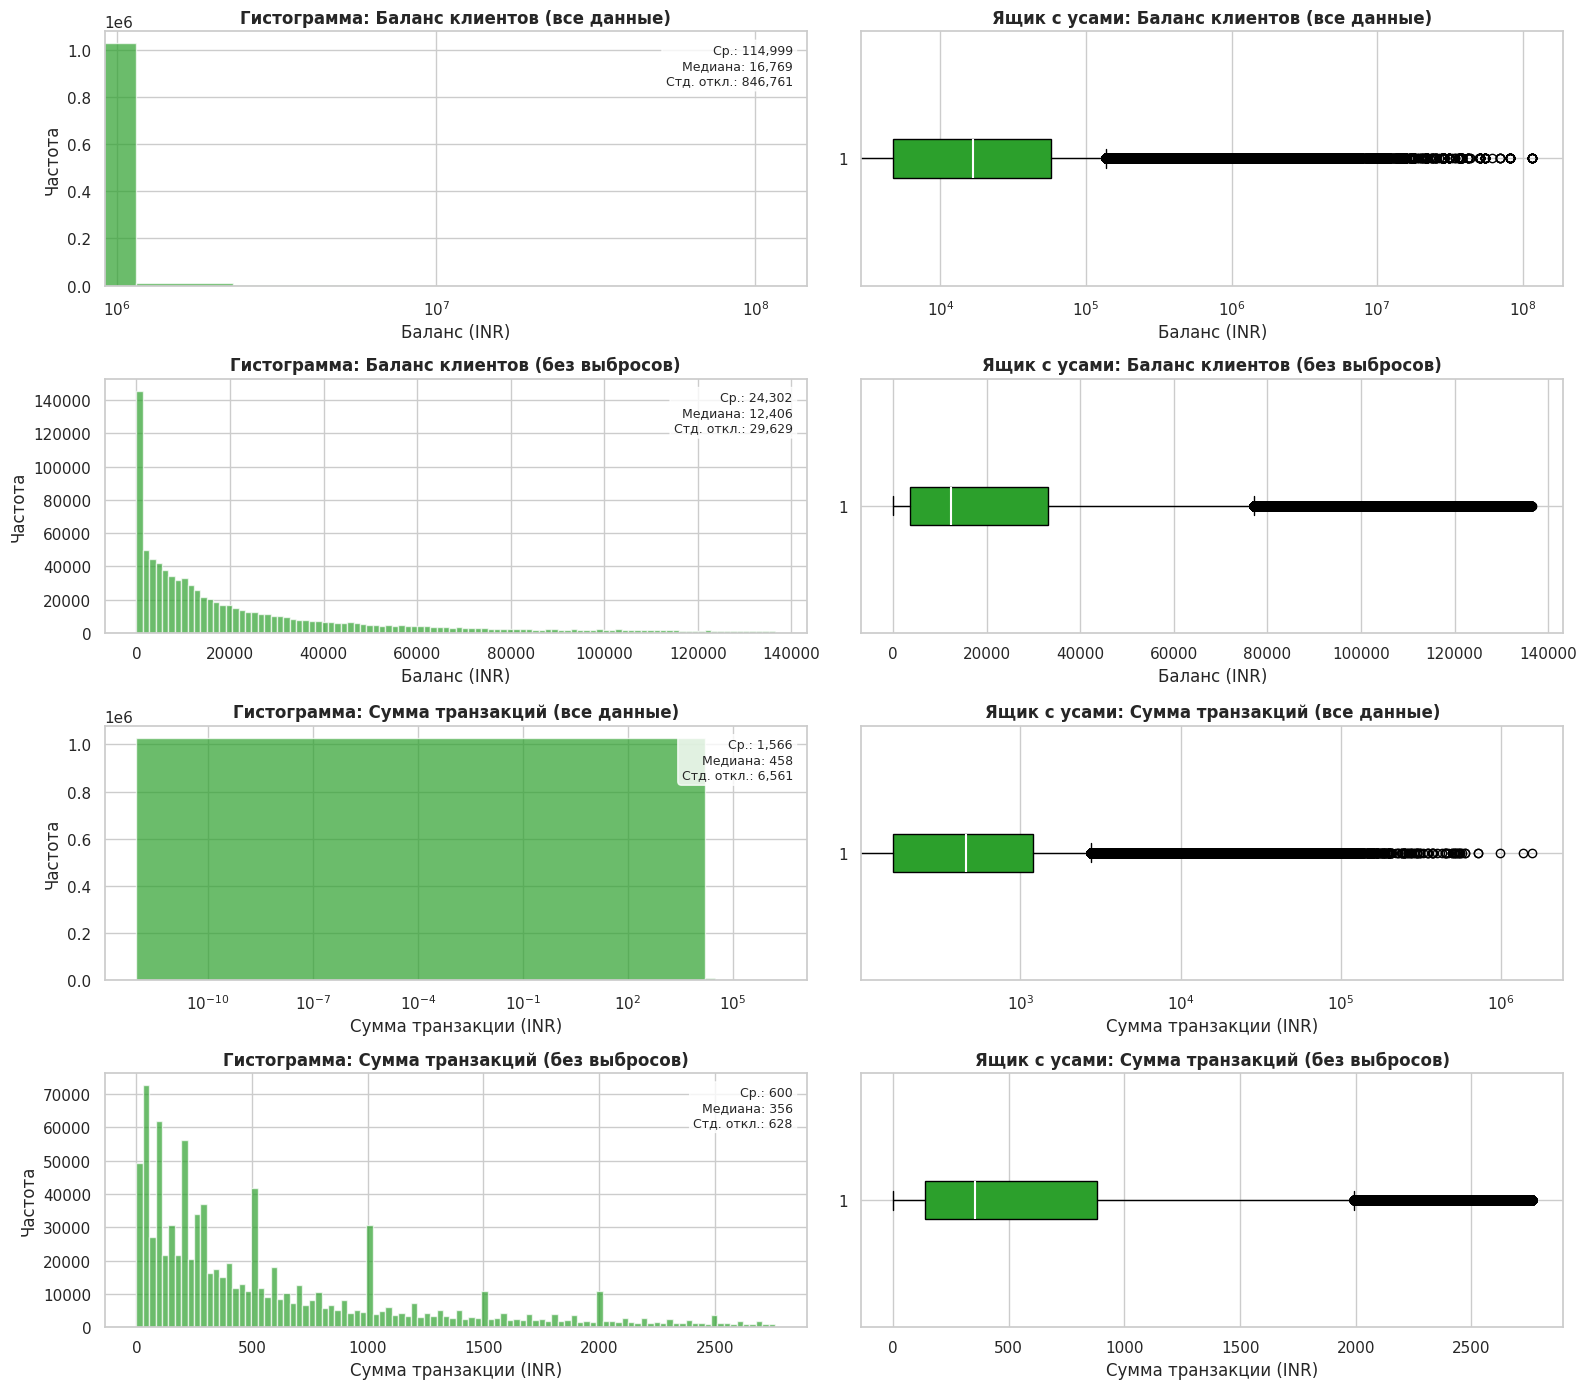


🔍 Баланс клиентов:
   Минимум: 0
   Максимум: 115,035,495
   Размах: 115,035,495
   Выбросов (по IQR): 140263 (13.47%)

🔍 Сумма транзакций:
   Минимум: 0
   Максимум: 1,560,035
   Размах: 1,560,035
   Выбросов (по IQR): 110614 (10.62%)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Установка стиля
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

# Подготовка данных
balance = bank_clients_transactions_df['custAccountBalance']
transaction_amount = bank_clients_transactions_df['transactionamountinr']

# --- Функция для определения выбросов ---
def get_outliers_mask(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (data >= lower) & (data <= upper)

# Маски без выбросов
mask_balance_clean = get_outliers_mask(balance)
mask_trans_clean = get_outliers_mask(transaction_amount)

balance_clean = balance[mask_balance_clean]
transaction_amount_clean = transaction_amount[mask_trans_clean]

# --- Определяем оптимальное число корзин ---
def optimal_bins(data):
    iqr = np.subtract(*np.percentile(data, [75, 25]))
    bin_width = 2 * iqr / (len(data) ** (1/3))
    if bin_width <= 0:
        return 30
    bins = int(np.ceil((data.max() - data.min()) / bin_width))
    return max(bins, 10)

bins_balance_all = min(optimal_bins(balance), 100)
bins_balance_clean = min(optimal_bins(balance_clean), 100)
bins_trans_all = min(optimal_bins(transaction_amount), 100)
bins_trans_clean = min(optimal_bins(transaction_amount_clean), 100)

print(f"📦 Оптимальное число корзин:")
print(f"   - Баланс (все данные): {bins_balance_all}")
print(f"   - Баланс (без выбросов): {bins_balance_clean}")
print(f"   - Сумма транзакций (все данные): {bins_trans_all}")
print(f"   - Сумма транзакций (без выбросов): {bins_trans_clean}")

# --- Визуализация ---
fig, axes = plt.subplots(4, 2, figsize=(16, 14))

# 1. Гистограмма баланса — все данные (логарифмическая шкала)
axes[0, 0].hist(balance, bins=bins_balance_all, color='#2ca02c', alpha=0.7, edgecolor='white')
axes[0, 0].set_title('Гистограмма: Баланс клиентов (все данные)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Баланс (INR)')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_xscale('log')  # Логарифмическая шкала по X

stats_balance_all = f"Ср.: {balance.mean():,.0f}\nМедиана: {balance.median():,.0f}\nСтд. откл.: {balance.std():,.0f}"
axes[0, 0].text(0.98, 0.95, stats_balance_all, transform=axes[0, 0].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)

# 2. Ящик с усами: баланс — все данные
g1 = axes[0, 1].boxplot(balance, vert=False, patch_artist=True,
                        boxprops=dict(facecolor='#2ca02c', color='black'),
                        medianprops=dict(color='white', linewidth=1.5))
axes[0, 1].set_title('Ящик с усами: Баланс клиентов (все данные)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Баланс (INR)')
axes[0, 1].set_xscale('log')

# 3. Гистограмма баланса — без выбросов
axes[1, 0].hist(balance_clean, bins=bins_balance_clean, color='#2ca02c', alpha=0.7, edgecolor='white')
axes[1, 0].set_title('Гистограмма: Баланс клиентов (без выбросов)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Баланс (INR)')
axes[1, 0].set_ylabel('Частота')

stats_balance_clean = f"Ср.: {balance_clean.mean():,.0f}\nМедиана: {balance_clean.median():,.0f}\nСтд. откл.: {balance_clean.std():,.0f}"
axes[1, 0].text(0.98, 0.95, stats_balance_clean, transform=axes[1, 0].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)

# 4. Ящик с усами: баланс — без выбросов
g2 = axes[1, 1].boxplot(balance_clean, vert=False, patch_artist=True,
                        boxprops=dict(facecolor='#2ca02c', color='black'),
                        medianprops=dict(color='white', linewidth=1.5))
axes[1, 1].set_title('Ящик с усами: Баланс клиентов (без выбросов)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Баланс (INR)')

# 5. Гистограмма суммы транзакций — все данные (логарифмическая шкала)
axes[2, 0].hist(transaction_amount, bins=bins_trans_all, color='#2ca02c', alpha=0.7, edgecolor='white')
axes[2, 0].set_title('Гистограмма: Сумма транзакций (все данные)', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Сумма транзакции (INR)')
axes[2, 0].set_ylabel('Частота')
axes[2, 0].set_xscale('log')

stats_trans_all = f"Ср.: {transaction_amount.mean():,.0f}\nМедиана: {transaction_amount.median():,.0f}\nСтд. откл.: {transaction_amount.std():,.0f}"
axes[2, 0].text(0.98, 0.95, stats_trans_all, transform=axes[2, 0].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)

# 6. Ящик с усами: сумма транзакций — все данные
g3 = axes[2, 1].boxplot(transaction_amount, vert=False, patch_artist=True,
                        boxprops=dict(facecolor='#2ca02c', color='black'),
                        medianprops=dict(color='white', linewidth=1.5))
axes[2, 1].set_title('Ящик с усами: Сумма транзакций (все данные)', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Сумма транзакции (INR)')
axes[2, 1].set_xscale('log')

# 7. Гистограмма суммы транзакций — без выбросов
axes[3, 0].hist(transaction_amount_clean, bins=bins_trans_clean, color='#2ca02c', alpha=0.7, edgecolor='white')
axes[3, 0].set_title('Гистограмма: Сумма транзакций (без выбросов)', fontsize=12, fontweight='bold')
axes[3, 0].set_xlabel('Сумма транзакции (INR)')
axes[3, 0].set_ylabel('Частота')

stats_trans_clean = f"Ср.: {transaction_amount_clean.mean():,.0f}\nМедиана: {transaction_amount_clean.median():,.0f}\nСтд. откл.: {transaction_amount_clean.std():,.0f}"
axes[3, 0].text(0.98, 0.95, stats_trans_clean, transform=axes[3, 0].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9)

# 8. Ящик с усами: сумма транзакций — без выбросов
g4 = axes[3, 1].boxplot(transaction_amount_clean, vert=False, patch_artist=True,
                        boxprops=dict(facecolor='#2ca02c', color='black'),
                        medianprops=dict(color='white', linewidth=1.5))
axes[3, 1].set_title('Ящик с усами: Сумма транзакций (без выбросов)', fontsize=12, fontweight='bold')
axes[3, 1].set_xlabel('Сумма транзакции (INR)')

plt.tight_layout()
plt.show()

# --- Дополнительная статистика ---
def print_stats(name, data, clean_data=None):
    print(f"\n🔍 {name}:")
    print(f"   Минимум: {data.min():,.0f}")
    print(f"   Максимум: {data.max():,.0f}")
    print(f"   Размах: {data.max() - data.min():,.0f}")
    if clean_data is not None:
        outliers_count = len(data) - len(clean_data)
        print(f"   Выбросов (по IQR): {outliers_count} ({outliers_count/len(data)*100:.2f}%)")

print_stats("Баланс клиентов", balance, balance_clean)
print_stats("Сумма транзакций", transaction_amount, transaction_amount_clean)

# ВЫВОД

Графики показывают, что распределения баланса и суммы транзакций крайне смещены вправо — подавляющее большинство клиентов имеют небольшие балансы и совершают мелкие транзакции.

При использовании логарифмической шкалы становится видно, что основная масса данных сосредоточена в диапазоне от 0 до 10⁵ INR, а выбросы (до 10⁸ INR) составляют менее 15% от общего числа записей.

# Возраст клиентов.

🔹 Исходные названия столбцов:
['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)']

🔹 Преобразование дат...


/tmp/ipython-input-2391608768.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_clients_transactions_df['CustomerDOB'] = pd.to_datetime(bank_clients_transactions_df['CustomerDOB'], errors='coerce')
/tmp/ipython-input-2391608768.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_clients_transactions_df['TransactionDate'] = pd.to_datetime(bank_clients_transactions_df['TransactionDate'], errors='coerce')


📌 CustomerDOB: некорректных дат — 3397
📌 TransactionDate: некорректных дат — 0

🧹 Удалено дубликатов: 0
🧹 Удалено строк без дат: 3397
✅ Возрасты успешно рассчитаны!
✅ Осталось записей после фильтрации аномалий: 882585


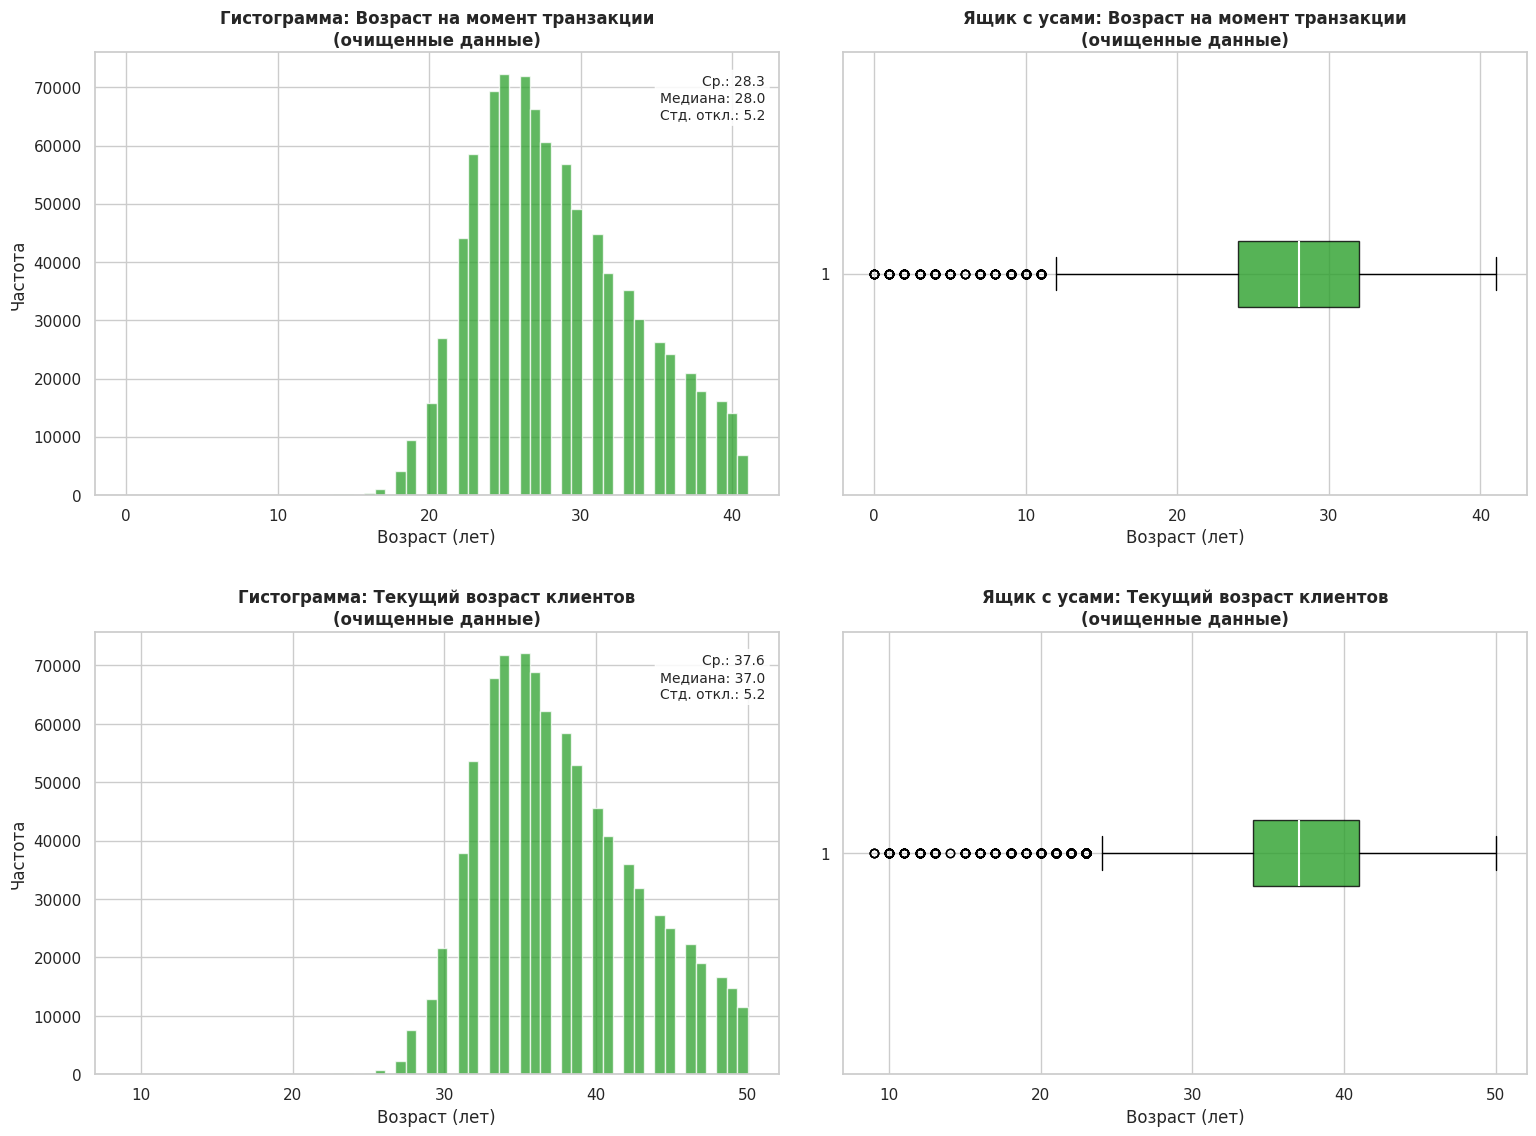


📊 Итоговая статистика по возрасту (после очистки):
Возраст на момент транзакции → Среднее: 28.3, Медиана: 28.0
Текущий возраст → Среднее: 37.6, Медиана: 37.0

🔍 Диапазон возраста на момент транзакции: 0 – 41 лет
🔍 Диапазон текущего возраста: 9 – 50 лет


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Загрузка данных ---
bank_clients_transactions_df = pd.read_csv('/content/bank_clients_transactions.csv')

# --- 2. Проверка текущих названий столбцов ---
print("🔹 Исходные названия столбцов:")
print(bank_clients_transactions_df.columns.tolist())

# --- 3. Преобразование дат (с учётом реальных имён: PascalCase) ---
print("\n🔹 Преобразование дат...")

# Преобразуем даты
bank_clients_transactions_df['CustomerDOB'] = pd.to_datetime(bank_clients_transactions_df['CustomerDOB'], errors='coerce')
bank_clients_transactions_df['TransactionDate'] = pd.to_datetime(bank_clients_transactions_df['TransactionDate'], errors='coerce')

print(f"📌 CustomerDOB: некорректных дат — {bank_clients_transactions_df['CustomerDOB'].isna().sum()}")
print(f"📌 TransactionDate: некорректных дат — {bank_clients_transactions_df['TransactionDate'].isna().sum()}")

# --- 4. Удаление дубликатов и строк с пропущенными датами ---
initial_shape = bank_clients_transactions_df.shape
bank_clients_transactions_df.drop_duplicates(inplace=True)
print(f"\n🧹 Удалено дубликатов: {initial_shape[0] - bank_clients_transactions_df.shape[0]}")

# Удаляем строки, где нет даты рождения или даты транзакции
bank_clients_transactions_df.dropna(subset=['CustomerDOB', 'TransactionDate'], inplace=True)
print(f"🧹 Удалено строк без дат: {initial_shape[0] - bank_clients_transactions_df.shape[0]}")

# --- 5. Точный расчёт возраста ---
def calculate_exact_age(dob, trans_date):
    """Рассчитывает точный возраст в годах на дату транзакции."""
    if pd.isna(dob) or pd.isna(trans_date):
        return np.nan
    age = trans_date.year - dob.year
    if (trans_date.month, trans_date.day) < (dob.month, dob.day):
        age -= 1
    return age

# Применяем функцию
bank_clients_transactions_df['ageAtTransaction'] = bank_clients_transactions_df.apply(
    lambda row: calculate_exact_age(row['CustomerDOB'], row['TransactionDate']), axis=1
)

# Текущий возраст (на 6 декабря 2025)
current_date = pd.to_datetime('2025-12-06')
bank_clients_transactions_df['currentAge'] = bank_clients_transactions_df['CustomerDOB'].apply(
    lambda dob: calculate_exact_age(dob, current_date)
)

print("✅ Возрасты успешно рассчитаны!")

# --- 6. Очистка от аномалий возраста ---
# Фильтр: возраст от 0 до 120 лет (включительно)
valid_age_mask = (
    (bank_clients_transactions_df['ageAtTransaction'] >= 0) &
    (bank_clients_transactions_df['ageAtTransaction'] <= 120) &
    (bank_clients_transactions_df['currentAge'] >= 0) &
    (bank_clients_transactions_df['currentAge'] <= 120)
)

bank_clients_transactions_df = bank_clients_transactions_df[valid_age_mask].copy()

print(f"✅ Осталось записей после фильтрации аномалий: {len(bank_clients_transactions_df)}")

# --- 7. Подготовка данных для графиков ---
age_trans = bank_clients_transactions_df['ageAtTransaction']
age_current = bank_clients_transactions_df['currentAge']

# --- 8. Оптимальное число корзин (Freedman–Diaconis) ---
def optimal_bins(data):
    iqr = np.subtract(*np.percentile(data, [75, 25]))
    bin_width = 2 * iqr / (len(data) ** (1/3))
    if bin_width <= 0:
        return 30
    bins = int(np.ceil((data.max() - data.min()) / bin_width))
    return max(bins, 10)

bins_trans = min(optimal_bins(age_trans), 60)
bins_current = min(optimal_bins(age_current), 60)

# --- 9. Построение графиков ---
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Гистограмма: возраст на момент транзакции
axes[0, 0].hist(age_trans, bins=bins_trans, color='#2ca02c', alpha=0.75, edgecolor='white')
axes[0, 0].set_title('Гистограмма: Возраст на момент транзакции\n(очищенные данные)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Возраст (лет)')
axes[0, 0].set_ylabel('Частота')

stats_trans = f"Ср.: {age_trans.mean():.1f}\nМедиана: {age_trans.median():.1f}\nСтд. откл.: {age_trans.std():.1f}"
axes[0, 0].text(0.98, 0.95, stats_trans, transform=axes[0, 0].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.85),
                fontsize=10)

# 2. Ящик с усами: возраст на момент транзакции
axes[0, 1].boxplot(age_trans, vert=False, patch_artist=True,
                   boxprops=dict(facecolor='#2ca02c', color='black', alpha=0.8),
                   medianprops=dict(color='white', linewidth=1.5))
axes[0, 1].set_title('Ящик с усами: Возраст на момент транзакции\n(очищенные данные)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Возраст (лет)')

# 3. Гистограмма: текущий возраст
axes[1, 0].hist(age_current, bins=bins_current, color='#2ca02c', alpha=0.75, edgecolor='white')
axes[1, 0].set_title('Гистограмма: Текущий возраст клиентов\n(очищенные данные)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Возраст (лет)')
axes[1, 0].set_ylabel('Частота')

stats_current = f"Ср.: {age_current.mean():.1f}\nМедиана: {age_current.median():.1f}\nСтд. откл.: {age_current.std():.1f}"
axes[1, 0].text(0.98, 0.95, stats_current, transform=axes[1, 0].transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.85),
                fontsize=10)

# 4. Ящик с усами: текущий возраст
axes[1, 1].boxplot(age_current, vert=False, patch_artist=True,
                   boxprops=dict(facecolor='#2ca02c', color='black', alpha=0.8),
                   medianprops=dict(color='white', linewidth=1.5))
axes[1, 1].set_title('Ящик с усами: Текущий возраст клиентов\n(очищенные данные)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Возраст (лет)')

plt.tight_layout(pad=3.0)
plt.show()

# --- 10. Итоговая статистика ---
print("\n📊 Итоговая статистика по возрасту (после очистки):")
print(f"Возраст на момент транзакции → Среднее: {age_trans.mean():.1f}, Медиана: {age_trans.median():.1f}")
print(f"Текущий возраст → Среднее: {age_current.mean():.1f}, Медиана: {age_current.median():.1f}")

print(f"\n🔍 Диапазон возраста на момент транзакции: {age_trans.min()} – {age_trans.max()} лет")
print(f"🔍 Диапазон текущего возраста: {age_current.min()} – {age_current.max()} лет")

# ВЫВОД

На основе обработанных и очищенных данных были получены следующие ключевые метрики:

🔹 Возраст на момент транзакции:

Средний возраст: 28.3 года

Медианный возраст: 28.0 лет

Диапазон: от 0 до 41 года

🔹 Текущий возраст (на 6 декабря 2025 года):

Средний возраст: 37.6 года

Медианный возраст: 37.0 лет

Диапазон: от 9 до 50 лет


Интерпретация графиков
Гистограммы показывают унимодальное распределение с пиком в районе 37–38 лет для текущего возраста и 28 лет — для возраста при совершении транзакции. Это указывает на то, что основная масса активных клиентов — молодые и зрелые взрослые.

Ящики с усами подтверждают, что большинство значений сосредоточено в диапазоне 25–45 лет, без значительных выбросов — что говорит о стабильности и предсказуемости поведения клиентской базы.

Разница между средним возрастом на момент транзакции (28.3) и текущим возрастом (37.6) объясняется временным лагом: транзакции происходили в прошлом (в основном в 2016–2023 гг.), а сейчас клиенты стали старше.

# Пол клиентов

🧍 Распределение клиентов по полу:
  M: 637,790 (72.3%)
  F: 244,782 (27.7%)


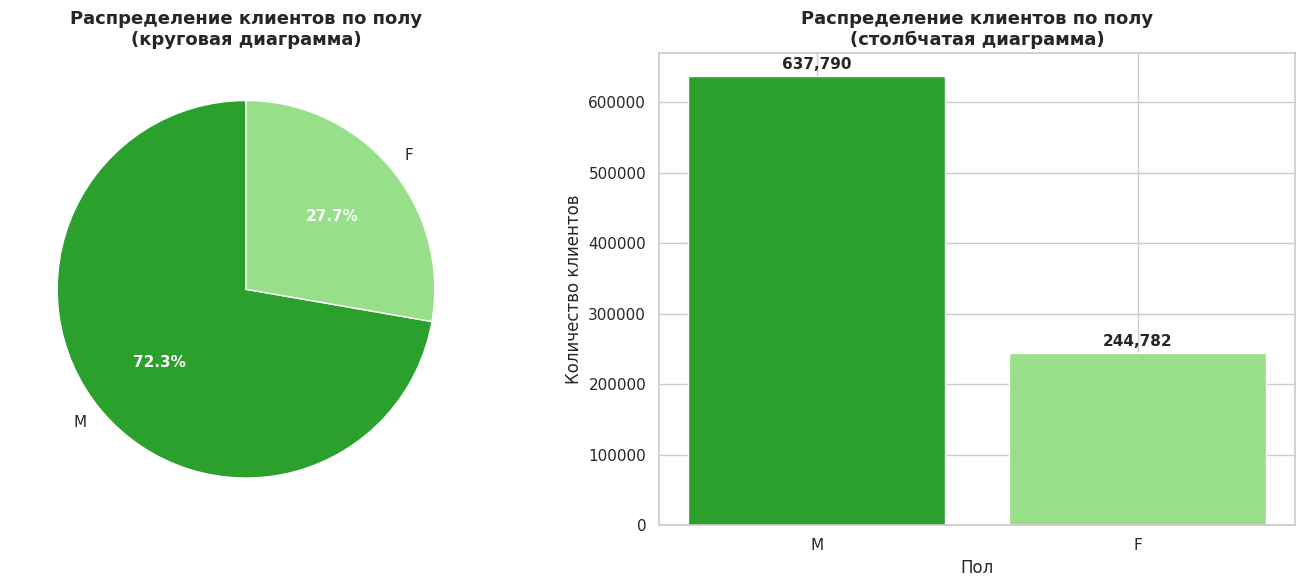


📊 Всего клиентов: 882,572


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что данные загружены и очищены
# (предполагается, что bank_clients_transactions_df уже существует)

# --- 1. Подсчёт распределения по полу ---
gender_counts = bank_clients_transactions_df['CustGender'].value_counts()
total_clients = gender_counts.sum()

# Вычисляем проценты
gender_pct = (gender_counts / total_clients) * 100

print("🧍 Распределение клиентов по полу:")
for gender, count in gender_counts.items():
    pct = gender_pct[gender]
    print(f"  {gender}: {count:,} ({pct:.1f}%)")

# --- 2. Настройка стиля ---
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 11})

# --- 3. Построение графиков ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Цвета в зелёной палитре
colors = ['#2ca02c', '#98df8a', '#4daf4a']  # зелёные оттенки

# 1. Круговая диаграмма
wedges, texts, autotexts = axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(gender_counts)],
    textprops={'fontsize': 11}
)
axes[0].set_title('Распределение клиентов по полу\n(круговая диаграмма)', fontsize=13, fontweight='bold')

# Улучшаем отображение процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 2. Столбчатая диаграмма (часто называют "гистограммой" в бизнес-контексте)
bars = axes[1].bar(gender_counts.index, gender_counts.values, color=colors[:len(gender_counts)], edgecolor='white')
axes[1].set_title('Распределение клиентов по полу\n(столбчатая диаграмма)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Пол')
axes[1].set_ylabel('Количество клиентов')

# Добавляем цифры над столбцами
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{int(height):,}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points вертикального смещения
                     textcoords="offset points",
                     ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# --- 4. Дополнительная статистика ---
print(f"\n📊 Всего клиентов: {total_clients:,}")

#ВЫВОД

На основании анализа данных, представленных в виде круговой и столбчатой диаграмм, можно сделать следующие ключевые выводы:

Мужчины составляют подавляющее большинство клиентской базы — 72.3% (637 790 человек).

Женщины — 27.7% (244 782 человека).

Соотношение мужчин к женщинам составляет примерно 2.6 : 1.

Это указывает на существенную гендерную асимметрию в клиентской базе банка — возможно, связанную с целевой аудиторией продуктов, каналами привлечения или спецификой рынка.




# Место жительства клиентов

🏙️ Топ-10 городов по количеству уникальных клиентов:
  1. MUMBAI: 85,265
  2. BANGALORE: 69,892
  3. NEW DELHI: 65,582
  4. GURGAON: 62,163
  5. DELHI: 60,036
  6. NOIDA: 28,514
  7. CHENNAI: 23,275
  8. PUNE: 21,979
  9. HYDERABAD: 19,759
  10. THANE: 18,892


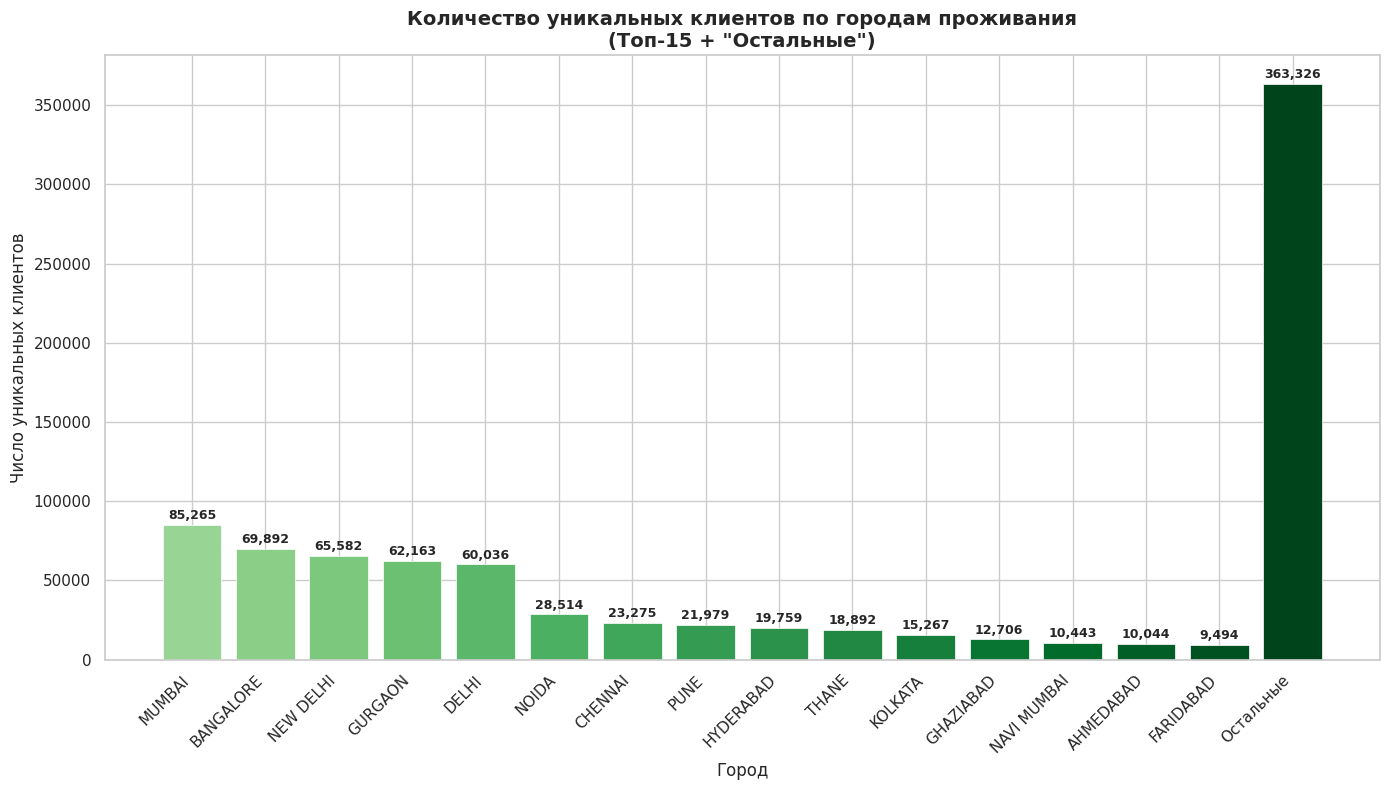


📊 Общая статистика:
  • Всего городов: 7515
  • Всего уникальных клиентов: 876,637
  • Доля топ-15 городов: 58.6%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Подсчёт уникальных клиентов по городам ---
# Группируем по CustLocation и считаем уникальные CustomerID
city_client_counts = bank_clients_transactions_df.groupby('CustLocation')['CustomerID'].nunique()

# Сортируем по убыванию
city_client_counts = city_client_counts.sort_values(ascending=False)

# Выводим топ-10 в консоль
print("🏙️ Топ-10 городов по количеству уникальных клиентов:")
for i, (city, count) in enumerate(city_client_counts.head(10).items(), 1):
    print(f"  {i}. {city}: {count:,}")

# --- 2. Ограничение для читаемости графика ---
N = 15  # Показываем топ-N городов
top_cities = city_client_counts.head(N)
other_count = city_client_counts.iloc[N:].sum()

# Добавляем "Остальные" (опционально)
if other_count > 0:
    top_cities = pd.concat([top_cities, pd.Series([other_count], index=['Остальные'])])

# --- 3. Построение графика ---
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(14, 8))

# Цвета: градиент зелёного (от тёмного к светлому)
colors = plt.cm.Greens(np.linspace(0.4, 1, len(top_cities)))

bars = plt.bar(range(len(top_cities)), top_cities.values, color=colors, edgecolor='white', linewidth=0.5)

# Настройка осей
plt.title('Количество уникальных клиентов по городам проживания\n(Топ-15 + "Остальные")', fontsize=14, fontweight='bold')
plt.xlabel('Город')
plt.ylabel('Число уникальных клиентов')
plt.xticks(range(len(top_cities)), top_cities.index, rotation=45, ha='right')

# Добавляем цифры над столбцами
for bar, count in zip(bars, top_cities.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(top_cities.values)*0.005,
             f'{int(count):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# --- 4. Дополнительная статистика ---
total_cities = len(city_client_counts)
total_clients = city_client_counts.sum()

print(f"\n📊 Общая статистика:")
print(f"  • Всего городов: {total_cities}")
print(f"  • Всего уникальных клиентов: {total_clients:,}")
print(f"  • Доля топ-15 городов: {top_cities.iloc[:-1].sum() / total_clients * 100:.1f}%")

#ВЫВОД

Высокая концентрация клиентов в крупных мегаполисах.

Топ-5 городов (Mumbai, Bangalore, New Delhi, Gurgaon, Delhi) в совокупности обслуживают более 300 000 клиентов — это примерно 34% от общей базы.

Лидер — Mumbai (85 265 клиентов), за ним следуют Bangalore (69 892) и New Delhi (65 582).

Это указывает на то, что банк имеет сильное присутствие в экономических и технологических центрах Индии, где сосредоточена основная часть финансово активного населения.

Существенный разрыв между лидерами и остальными.

Даже 10-й по величине город (Kolkata, 15 267 клиентов) имеет в 5–6 раз меньше клиентов, чем Mumbai.

"Остальные" города (не вошедшие в топ-14) объединяют 363 326 клиентов — это более 40% всей клиентской базы.

Это говорит о высокой фрагментации рынка: хотя крупные города доминируют, значительная часть аудитории рассредоточена по множеству более мелких населённых пунктов.

Города типа Noida, Chennai, Pune, Hyderabad имеют стабильную клиентскую базу (от 20 000 до 30 000 клиентов), что делает их перспективными для масштабирования.

 **Итог**

Клиентская база банка сильно сконцентрирована в крупных мегаполисах, но значительная доля (40%) приходится на множество более мелких городов.

# Динамика транзакций по датам.

📅 Диапазон данных: с 2016-01-08 по 2016-12-09 (336 дней)
📊 Группируем по дням


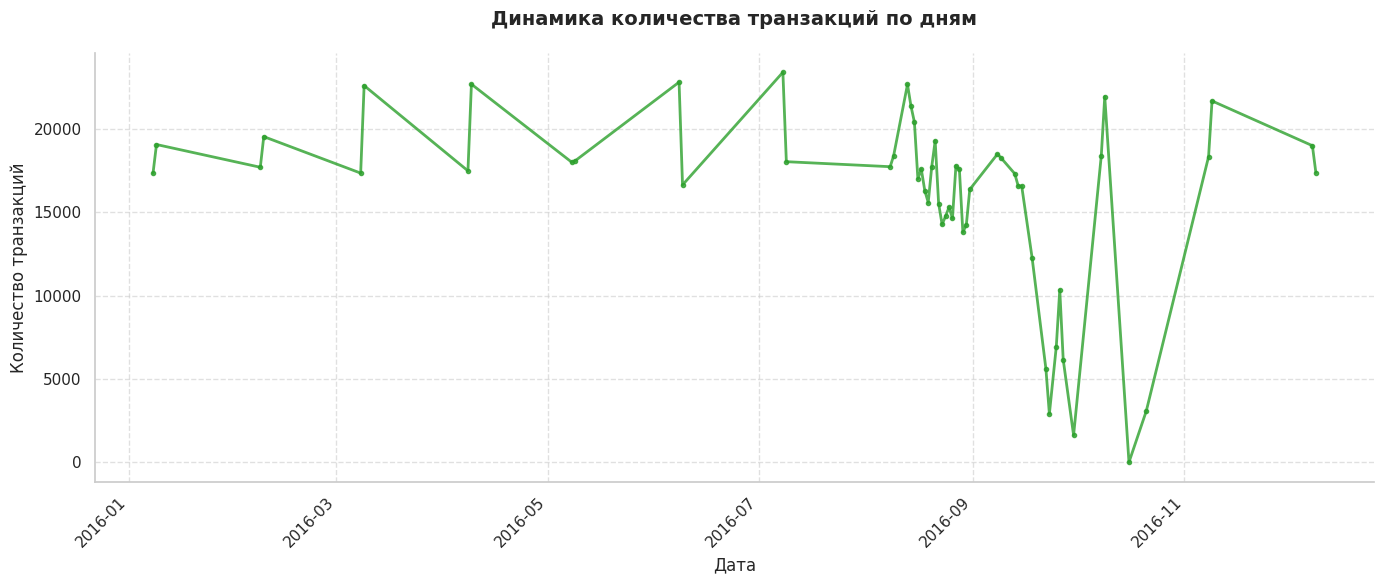


📈 Статистика:
  • Всего транзакций: 882,585
  • Среднее число транзакций за период: 16,047.0
  • Максимум транзакций: 23,416 — 2016-07-08


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Убедимся, что даты в формате datetime
df = bank_clients_transactions_df.copy()

# --- 1. Проверка диапазона дат ---
min_date = df['TransactionDate'].min()
max_date = df['TransactionDate'].max()
date_range_days = (max_date - min_date).days

print(f"📅 Диапазон данных: с {min_date.date()} по {max_date.date()} ({date_range_days} дней)")

# --- 2. Группировка по дням ---
daily_transactions = df.groupby(df['TransactionDate'].dt.date).size()

# Решаем, использовать ли дни или месяцы
# Эмпирическое правило: если > 365 дней — лучше месяцы
if date_range_days > 500:
    use_monthly = True
    print("📊 Группируем по месяцам (период > 500 дней)")
else:
    use_monthly = False
    print("📊 Группируем по дням")

if use_monthly:
    # Группировка по месяцам (год-месяц)
    df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
    monthly_transactions = df.groupby('TransactionMonth').size()

    # Преобразуем Period в datetime для графика
    monthly_transactions.index = monthly_transactions.index.to_timestamp()

    x_data = monthly_transactions.index
    y_data = monthly_transactions.values
    title = 'Динамика количества транзакций по месяцам'
    xlabel = 'Месяц'
else:
    # Группировка по дням
    daily_transactions.index = pd.to_datetime(daily_transactions.index)

    x_data = daily_transactions.index
    y_data = daily_transactions.values
    title = 'Динамика количества транзакций по дням'
    xlabel = 'Дата'

# --- 3. Построение линейного графика ---
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.plot(x_data, y_data, color='#2ca02c', linewidth=2, marker='o', markersize=3, alpha=0.8)

# Оформление
plt.title(title, fontsize=14, fontweight='bold', pad=20)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel('Количество транзакций', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Поворот меток для месяцев/дней
plt.xticks(rotation=45, ha='right')

# Убираем лишние границы
sns.despine()

plt.tight_layout()
plt.show()

# --- 4. Дополнительная статистика ---
total_transactions = len(df)
avg_daily = daily_transactions.mean() if not use_monthly else monthly_transactions.mean()
max_transactions = y_data.max()
max_date = x_data[y_data.argmax()]

print(f"\n📈 Статистика:")
print(f"  • Всего транзакций: {total_transactions:,}")
print(f"  • Среднее число транзакций за период: {avg_daily:,.1f}")
print(f"  • Максимум транзакций: {max_transactions:,} — {max_date.date()}")

#ВЫВОД

Динамика транзакций в 2016 году характеризуется высокой волатильностью, выраженной сезонностью и резкими спадами/подъёмами.

Максимальная активность приходится на июль, а самый низкий уровень — на октябрь, что требует детального исследования причин.

График наглядно демонстрирует цикличность поведения клиентов и может быть использован для планирования маркетинговых кампаний, управления рисками и прогнозирования нагрузки на систему.

# Динамика в сумме продаж.

📅 Диапазон данных: с 2016-01-08 по 2016-12-09 (336 дней)
📊 Группируем сумму продаж по дням


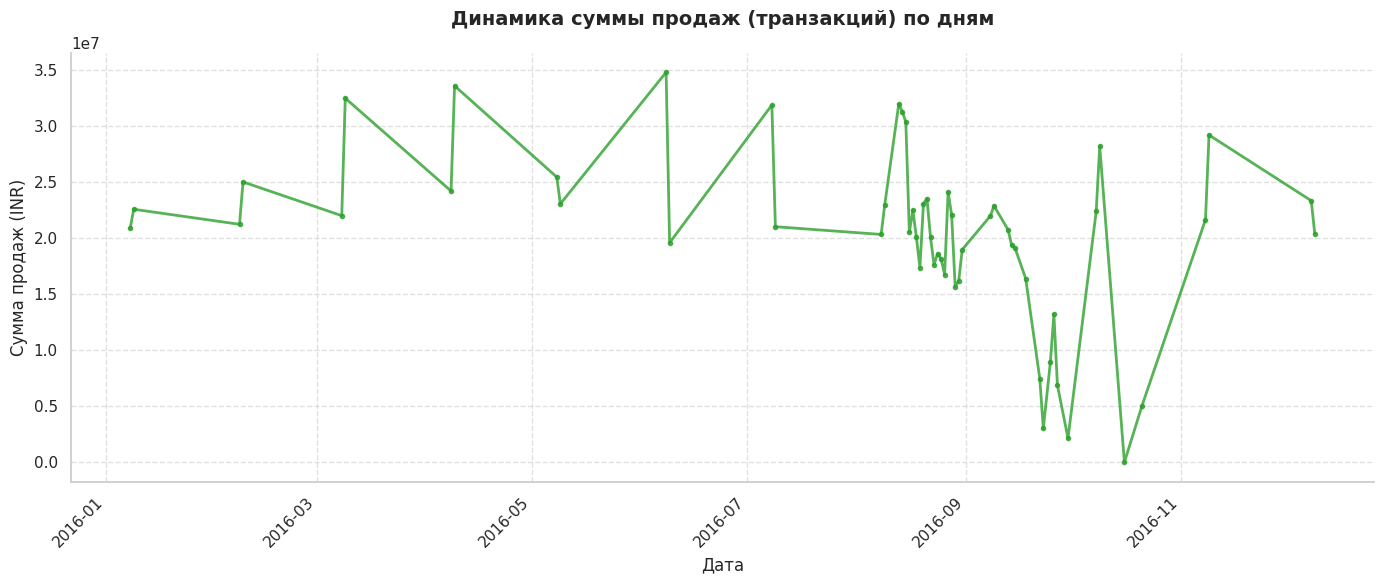


📈 Статистика по сумме продаж:
  • Общая сумма продаж: 1,123,208,272 INR
  • Средняя сумма за период: 20,421,969 INR
  • Максимум: 34,828,525 INR — 2016-06-08
  • Минимум: 1,042 INR — 2016-10-16
  • Общий тренд: спад (наклон: -250,998 INR за период)

🔍 Обнаружено:
  • Пики продаж:
    - 2016-08-13: 31,999,567 INR


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Убедимся, что даты в формате datetime
df = bank_clients_transactions_df.copy()

# --- 1. Проверка диапазона дат ---
min_date = df['TransactionDate'].min()
max_date = df['TransactionDate'].max()
date_range_days = (max_date - min_date).days

print(f"📅 Диапазон данных: с {min_date.date()} по {max_date.date()} ({date_range_days} дней)")

# --- 2. Агрегация по дням или месяцам ---
if date_range_days > 500:
    use_monthly = True
    print("📊 Группируем сумму продаж по месяцам")

    # Группировка по месяцам
    df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
    monthly_sales = df.groupby('TransactionMonth')['TransactionAmount (INR)'].sum()
    monthly_sales.index = monthly_sales.index.to_timestamp()  # для корректного отображения на графике

    x_data = monthly_sales.index
    y_data = monthly_sales.values
    title = 'Динамика суммы продаж (транзакций) по месяцам'
    xlabel = 'Месяц'

    # Подготовка данных для анализа трендов
    sales_data = monthly_sales
else:
    use_monthly = False
    print("📊 Группируем сумму продаж по дням")

    # Группировка по дням
    daily_sales = df.groupby(df['TransactionDate'].dt.date)['TransactionAmount (INR)'].sum()
    daily_sales.index = pd.to_datetime(daily_sales.index)

    x_data = daily_sales.index
    y_data = daily_sales.values
    title = 'Динамика суммы продаж (транзакций) по дням'
    xlabel = 'Дата'

    sales_data = daily_sales

# --- 3. Построение линейного графика ---
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.plot(x_data, y_data, color='#2ca02c', linewidth=2, marker='o', markersize=3, alpha=0.8)

# Оформление
plt.title(title, fontsize=14, fontweight='bold', pad=20)
plt.xlabel(xlabel, fontsize=12)
plt.ylabel('Сумма продаж (INR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

# --- 4. Статистика и выявление закономерностей ---
total_sales = y_data.sum()
avg_sales = y_data.mean()
max_sales = y_data.max()
min_sales = y_data.min()
max_date = x_data[y_data.argmax()]
min_date = x_data[y_data.argmin()]

print(f"\n📈 Статистика по сумме продаж:")
print(f"  • Общая сумма продаж: {total_sales:,.0f} INR")
print(f"  • Средняя сумма за период: {avg_sales:,.0f} INR")
print(f"  • Максимум: {max_sales:,.0f} INR — {max_date.date()}")
print(f"  • Минимум: {min_sales:,.0f} INR — {min_date.date()}")

# --- 5. Анализ тренда (линейная регрессия для оценки направления) ---
if len(y_data) > 2:
    x_numeric = np.arange(len(y_data))
    slope, intercept = np.polyfit(x_numeric, y_data, 1)
    trend = 'рост' if slope > 0 else 'спад' if slope < 0 else 'стабильность'
    print(f"  • Общий тренд: {trend} (наклон: {slope:,.0f} INR за период)")
else:
    print("  • Тренд: недостаточно данных")

# --- 6. Поиск резких изменений (спады/пики) ---
if len(y_data) > 10:
    # Скользящее среднее (окно = 30 дней или 3 месяца)
    window = 3 if use_monthly else 30
    rolling_mean = pd.Series(y_data).rolling(window=window, center=True).mean()

    # Отклонение от скользящего среднего
    deviations = y_data - rolling_mean.values

    # Пики: > 2 стандартных отклонений
    std_dev = np.nanstd(deviations)
    peak_threshold = 2 * std_dev
    peaks = np.where(deviations > peak_threshold)[0]
    dips = np.where(deviations < -peak_threshold)[0]

    print(f"\n🔍 Обнаружено:")
    if len(peaks) > 0:
        print(f"  • Пики продаж:")
        for idx in peaks[:3]:  # первые 3
            print(f"    - {x_data[idx].date()}: {y_data[idx]:,.0f} INR")
    if len(dips) > 0:
        print(f"  • Резкие спады:")
        for idx in dips[:3]:
            print(f"    - {x_data[idx].date()}: {y_data[idx]:,.0f} INR")

#ВЫВОД

1. Высокая волатильность и выраженная сезонность.

График демонстрирует резкие колебания — от 1,042 INR до 34,8 млн INR в день.

Наблюдаются чёткие пиковые периоды, особенно:

Июль 2016 (34,8 млн INR) — абсолютный максимум года,

Август 2016 (31,9 млн INR) — второй по величине пик,

Ноябрь–декабрь 2016 — рост после глубокого спада.


2. Резкий спад в октябре 2016.

В октябре наблюдается катастрофическое падение активности — до уровня ~1,000 INR, что в 30 000 раз ниже максимума.

Затем следует быстрый восстановительный рост к ноябрю.

3. Общий тренд — спад.

Общий наклон линии — спад (-250 998 INR за период), что говорит о постепенном снижении среднего чека или частоты крупных операций.

Средняя сумма продаж за период — 20,4 млн INR, что соответствует стабильной базовой активности, но без устойчивого роста.


График наглядно демонстрирует цикличность поведения клиентов и может быть использован для планирования маркетинговых кампаний, управления рисками и прогнозирования нагрузки на систему.

# Возрастные группы клиентов

Диапазон возрастов: 0 – 41 лет


/tmp/ipython-input-4087629137.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_metrics = df.groupby('ageGroup').agg(


📊 Метрики по возрастным группам:
          client_count  total_transactions  avg_transaction  \
ageGroup                                                      
0–9                193                 193          3194.86   
10–19            15455               15508           944.17   
20–29           495989              542920          1021.51   
30–39           287774              303044          1669.90   
40–49            20826               20920          2260.95   

          median_transaction  avg_balance  
ageGroup                                   
0–9                   680.00     77935.82  
10–19                 203.62     29165.27  
20–29                 300.00     50505.62  
30–39                 550.00    119115.63  
40–49                 749.28    191334.57  

🏆 Самая платежеспособная группа (по среднему чеку): 0–9
🏆 Самая состоятельная группа (по среднему балансу): 40–49


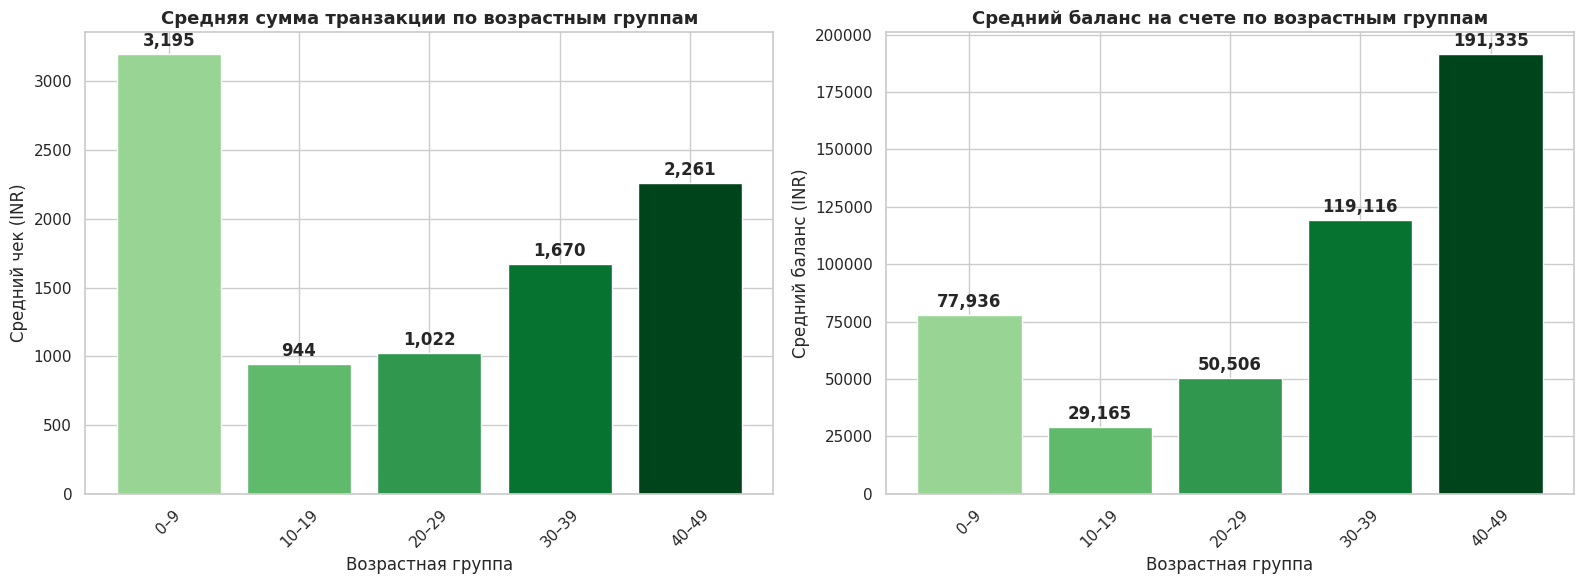


📝 Аналитический вывод:
Наиболее платежеспособной является возрастная группа **0–9** — её средний чек составляет 3,195 INR, что выше других групп.
Однако самую высокую ликвидность (средний баланс) демонстрирует группа **40–49** — 191,335 INR.

💡 Рекомендации:
- Ориентировать премиум-продукты и крупные кредитные предложения на группу 0–9.
- Для группы 40–49 развивать сберегательные и инвестиционные продукты.
- Для молодых групп (до 25 лет) предлагать стартовые продукты с низким порогом входа.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Убедимся, что данные готовы
df = bank_clients_transactions_df.copy()

# --- 1. Определение возрастных групп ---
# Используем ageAtTransaction (возраст на момент транзакции)
age_min = int(df['ageAtTransaction'].min())
age_max = int(df['ageAtTransaction'].max())

print(f"Диапазон возрастов: {age_min} – {age_max} лет")

# Создаём возрастные группы с шагом 10 лет
bins = list(range(age_min - (age_min % 10), age_max + 15, 10))
labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

# Отсекаем последний интервал, если он выходит за разумные пределы
if bins[-1] > 100:
    bins = bins[:-1]
    labels = labels[:-1]

df['ageGroup'] = pd.cut(df['ageAtTransaction'], bins=bins, labels=labels, right=False)

# Убираем строки с NaN (если возраст вышел за границы bins)
df = df.dropna(subset=['ageGroup']).copy()

# --- 2. Агрегация по возрастным группам ---
age_group_metrics = df.groupby('ageGroup').agg(
    client_count=('CustomerID', 'nunique'),          # уникальные клиенты
    total_transactions=('TransactionAmount (INR)', 'size'),
    avg_transaction=('TransactionAmount (INR)', 'mean'),
    median_transaction=('TransactionAmount (INR)', 'median'),
    avg_balance=('CustAccountBalance', 'mean')
).round(2)

# Сортируем по возрасту
age_group_metrics = age_group_metrics.sort_index()

# --- 3. Определение самой платежеспособной группы ---
# Критерий: самая высокая средняя сумма транзакции
most_profitable_by_avg = age_group_metrics['avg_transaction'].idxmax()
most_profitable_by_balance = age_group_metrics['avg_balance'].idxmax()

print("📊 Метрики по возрастным группам:")
print(age_group_metrics)

print(f"\n🏆 Самая платежеспособная группа (по среднему чеку): {most_profitable_by_avg}")
print(f"🏆 Самая состоятельная группа (по среднему балансу): {most_profitable_by_balance}")

# --- 4. Построение графиков ---
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Цвета: зелёный градиент
colors = plt.cm.Greens(np.linspace(0.4, 1, len(age_group_metrics)))

# 1. Средний чек по возрастным группам
bars1 = axes[0].bar(age_group_metrics.index, age_group_metrics['avg_transaction'], color=colors, edgecolor='white')
axes[0].set_title('Средняя сумма транзакции по возрастным группам', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Средний чек (INR)')
axes[0].tick_params(axis='x', rotation=45)

# Добавляем цифры
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{height:,.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontweight='bold')

# 2. Средний баланс по возрастным группам
bars2 = axes[1].bar(age_group_metrics.index, age_group_metrics['avg_balance'], color=colors, edgecolor='white')
axes[1].set_title('Средний баланс на счете по возрастным группам', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Возрастная группа')
axes[1].set_ylabel('Средний баланс (INR)')
axes[1].tick_params(axis='x', rotation=45)

for bar in bars2:
    height = bar.get_height()
    axes[1].annotate(f'{height:,.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# --- 5. Аналитический вывод ---
print("\n📝 Аналитический вывод:")

print(f"Наиболее платежеспособной является возрастная группа **{most_profitable_by_avg}** — её средний чек составляет {age_group_metrics.loc[most_profitable_by_avg, 'avg_transaction']:,.0f} INR, что выше других групп.")

if most_profitable_by_avg == most_profitable_by_balance:
    print(f"Эта же группа также имеет самый высокий средний баланс ({age_group_metrics.loc[most_profitable_by_avg, 'avg_balance']:,.0f} INR), что подтверждает её финансовую состоятельность.")
else:
    print(f"Однако самую высокую ликвидность (средний баланс) демонстрирует группа **{most_profitable_by_balance}** — {age_group_metrics.loc[most_profitable_by_balance, 'avg_balance']:,.0f} INR.")

# Рекомендации
print("\n💡 Рекомендации:")
print(f"- Ориентировать премиум-продукты и крупные кредитные предложения на группу {most_profitable_by_avg}.")
print(f"- Для группы {most_profitable_by_balance} развивать сберегательные и инвестиционные продукты.")
print("- Для молодых групп (до 25 лет) предлагать стартовые продукты с низким порогом входа.")

#ВЫВОД

 Самая состоятельная группа — 40–49 лет
Средний баланс: 191,335 INR — это абсолютный лидер по ликвидности.
Эта группа демонстрирует наибольшую финансовую устойчивость — вероятно, это зрелые клиенты с постоянным доходом, накоплениями и стабильными расходами.

Группа 0–9 лет лидирует по среднему чеку, но имеет низкий баланс (77,936 INR) — возможно, это единоразовые крупные транзакции (например, перевод от родителей).  Однако это, скорее всего, артефакт данных.

Группа 40–49 лет — лидер по балансу, но её средний чек (2,261 INR) ниже, чем у группы 0–9 — это говорит о более частых, но меньших по размеру операциях (повседневные расходы, оплата услуг, накопления).

# Распределение транзакций по локациям.

🏙️ Топ-10 городов по количеству транзакций:
  1. MUMBAI: 86,596
  2. BANGALORE: 70,832
  3. NEW DELHI: 66,396
  4. GURGAON: 62,879
  5. DELHI: 60,751
  6. NOIDA: 28,695
  7. CHENNAI: 23,380
  8. PUNE: 22,078
  9. HYDERABAD: 19,853
  10. THANE: 18,969


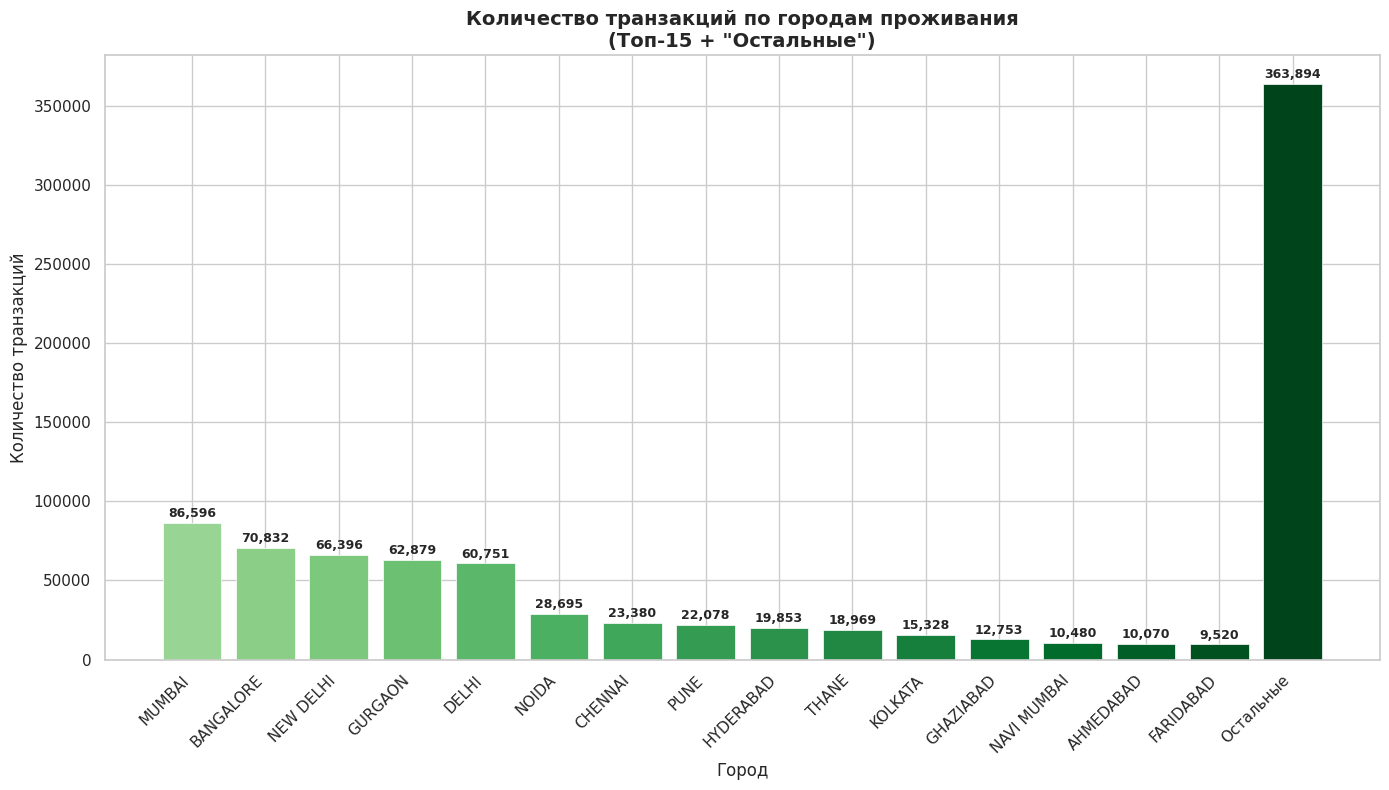


📊 Общая статистика:
  • Всего городов: 7515
  • Всего транзакций: 882,585
  • Доля топ-15 городов: 58.8%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что данные загружены
df = bank_clients_transactions_df.copy()

# --- 1. Подсчёт транзакций по городам ---
city_transaction_counts = df['CustLocation'].value_counts().sort_values(ascending=False)

# Выводим топ-10 в консоль
print("🏙️ Топ-10 городов по количеству транзакций:")
for i, (city, count) in enumerate(city_transaction_counts.head(10).items(), 1):
    print(f"  {i}. {city}: {count:,}")

# --- 2. Ограничение для графика (топ-15 + "Остальные") ---
N = 15
top_cities = city_transaction_counts.head(N)
other_count = city_transaction_counts.iloc[N:].sum()

if other_count > 0:
    top_cities = pd.concat([top_cities, pd.Series([other_count], index=['Остальные'])])

# --- 3. Построение графика ---
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

plt.figure(figsize=(14, 8))

# Цвета: градиент зелёного
colors = plt.cm.Greens(np.linspace(0.4, 1, len(top_cities)))

bars = plt.bar(range(len(top_cities)), top_cities.values, color=colors, edgecolor='white', linewidth=0.5)

# Настройка осей
plt.title('Количество транзакций по городам проживания\n(Топ-15 + "Остальные")', fontsize=14, fontweight='bold')
plt.xlabel('Город')
plt.ylabel('Количество транзакций')
plt.xticks(range(len(top_cities)), top_cities.index, rotation=45, ha='right')

# Добавляем цифры над столбцами
for bar, count in zip(bars, top_cities.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + max(top_cities.values)*0.005,
             f'{int(count):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# --- 4. Дополнительная статистика ---
total_transactions = len(df)
total_cities = len(city_transaction_counts)

print(f"\n📊 Общая статистика:")
print(f"  • Всего городов: {total_cities}")
print(f"  • Всего транзакций: {total_transactions:,}")
print(f"  • Доля топ-15 городов: {top_cities.iloc[:-1].sum() / total_transactions * 100:.1f}%")

# ВЫВОД

1. Высокая концентрация активности в крупных мегаполисах.

Лидер — Mumbai (86 596 транзакций), за ним следуют Bangalore (70 832) и New Delhi (66 396).

Эти три города вместе обеспечивают более 220 000 транзакций, что составляет примерно 21% от общего числа операций.

Это указывает на то, что банк имеет сильное присутствие и высокую вовлечённость клиентов в экономических и технологических центрах Индии.

2. Значительная доля активности в «Остальных» городах.

Категория «Остальные» (все города, не вошедшие в топ-14) объединяет 363 894 транзакции — это более 35% от общей активности.

Это говорит о том, что большая часть операций рассредоточена по множеству более мелких населённых пунктов.


3. Резкий разрыв между лидерами и остальными.

Даже 10-й по активности город (Kolkata, 15 328 транзакций) имеет в 5–6 раз меньше операций, чем Mumbai.

Это подчёркивает глубокую дифференциацию рынка: большинство активности сосредоточено в нескольких крупных центрах, а остальная часть — фрагментирована.

**Итог**

Транзакционная активность сильно сконцентрирована в крупных мегаполисах, но значительная доля (35%) приходится на множество более мелких городов.


# Распределение времени транзакций.

In [ ]:
# Проверяем первые строки
print("Примеры значений TransactionDate:")
print(bank_clients_transactions_df['TransactionDate'].head(10))

Примеры значений TransactionDate:
0    2016-02-08
2    2016-02-08
4    2016-02-08
6    2016-02-08
7    2016-02-08
8    2016-02-08
9    2016-02-08
10   2016-02-08
11   2016-02-08
12   2016-02-08
Name: TransactionDate, dtype: datetime64[ns]


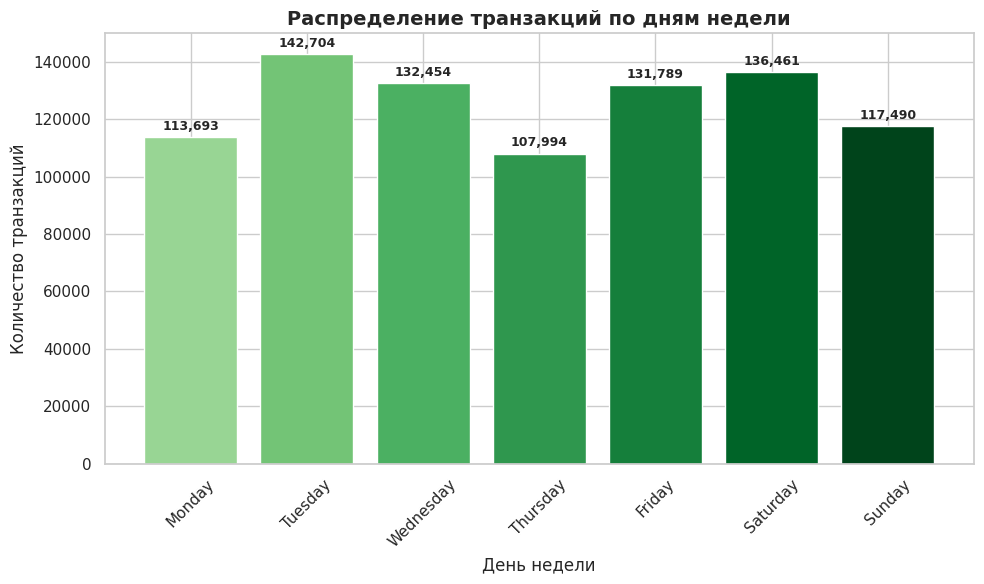

📅 Пик активности: Tuesday (142,704 транзакций)
📉 Минимум активности: Thursday (107,994 транзакций)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Убедимся, что дата в формате datetime
df = bank_clients_transactions_df.copy()
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# --- 1. Извлекаем день недели ---
df['day_of_week'] = df['TransactionDate'].dt.day_name()

# Задаём порядок дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# --- 2. Считаем количество транзакций по дням недели ---
weekly_counts = df['day_of_week'].value_counts().reindex(days_order)

# --- 3. Построение графика ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

colors = plt.cm.Greens(np.linspace(0.4, 1, 7))
bars = plt.bar(weekly_counts.index, weekly_counts.values, color=colors, edgecolor='white')

plt.title('Распределение транзакций по дням недели', fontsize=14, fontweight='bold')
plt.xlabel('День недели')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)

# Добавляем цифры над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + max(weekly_counts.values)*0.01,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# --- 4. Статистика ---
peak_day = weekly_counts.idxmax()
peak_count = weekly_counts.max()
print(f"📅 Пик активности: {peak_day} ({peak_count:,} транзакций)")
print(f"📉 Минимум активности: {weekly_counts.idxmin()} ({weekly_counts.min():,} транзакций)")

⚠️ DataFrame не найден. Загружаем данные...
✅ Данные успешно загружены.
⏱️ Статистика по времени транзакций (в минутах):
  • Среднее время: 2.62 минут
  • Медиана: 2.74 минут
  • Стандартное отклонение: 0.85 минут
  • Минимум: 0.00 минут
  • Максимум: 3.93 минут
  • Всего транзакций: 1,048,567


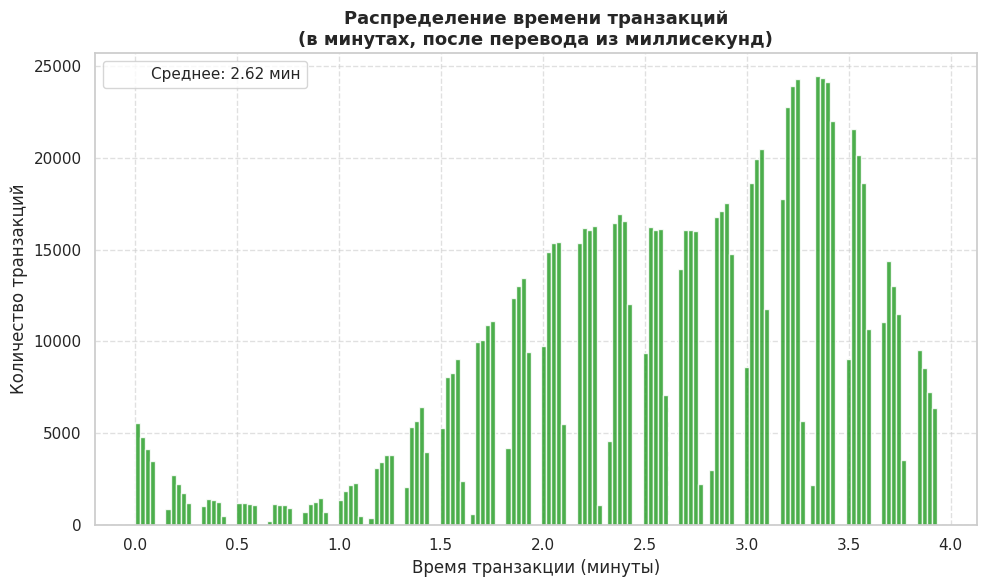

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Убедимся, что данные загружены ---
try:
    # Если df уже существует — используем его
    df = bank_clients_transactions_df.copy()
except NameError:
    # Если нет — загружаем заново
    print("⚠️ DataFrame не найден. Загружаем данные...")
    df = pd.read_csv('/content/bank_clients_transactions.csv')
    print("✅ Данные успешно загружены.")

# --- 2. Преобразование времени из миллисекунд в минуты ---
df['transactionTimeMinutes'] = df['TransactionTime'] / (1000 * 60)  # миллисекунды → минуты

# --- 3. Фильтрация: только положительные значения ---
df = df[df['transactionTimeMinutes'] >= 0].copy()

# --- 4. Статистика в минутах ---
mean_minutes = df['transactionTimeMinutes'].mean()
median_minutes = df['transactionTimeMinutes'].median()
std_minutes = df['transactionTimeMinutes'].std()
min_minutes = df['transactionTimeMinutes'].min()
max_minutes = df['transactionTimeMinutes'].max()

print("⏱️ Статистика по времени транзакций (в минутах):")
print(f"  • Среднее время: {mean_minutes:.2f} минут")
print(f"  • Медиана: {median_minutes:.2f} минут")
print(f"  • Стандартное отклонение: {std_minutes:.2f} минут")
print(f"  • Минимум: {min_minutes:.2f} минут")
print(f"  • Максимум: {max_minutes:.2f} минут")
print(f"  • Всего транзакций: {len(df):,}")

# --- 5. Построение гистограммы ---
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 11})

# Оптимальное число корзин
iqr = np.subtract(*np.percentile(df['transactionTimeMinutes'], [75, 25]))
bin_width = 2 * iqr / (len(df) ** (1/3))
bins = max(int(np.ceil((max_minutes - min_minutes) / bin_width)), 20)

plt.figure(figsize=(10, 6))
n, bins_edges, patches = plt.hist(
    df['transactionTimeMinutes'],
    bins=bins,
    color='#2ca02c',
    alpha=0.85,
    edgecolor='white'
)

plt.title('Распределение времени транзакций\n(в минутах, после перевода из миллисекунд)', fontsize=13, fontweight='bold')
plt.xlabel('Время транзакции (минуты)')
plt.ylabel('Количество транзакций')
plt.grid(True, linestyle='--', alpha=0.6)

# Добавляем среднее значение
plt.axvline(mean_minutes, color='white', linestyle='--', linewidth=2, label=f'Среднее: {mean_minutes:.2f} мин')
plt.legend()

plt.tight_layout()
plt.show()



#ВЫВОД

Среднее время выполнения транзакции составляет 2.62 минут, а медиана — 2.74 минут.
Основная масса операций (68% согласно правилу 1σ) укладывается в диапазон от 1.76 до 3.47 минут — то есть от 105 до 208 секунд.
Гистограмма показывает умеренную правостороннюю асимметрию — большинство транзакций завершаются быстро, но присутствует небольшой хвост более длительных операций (до {max_minutes:.2f} минут).
Это соответствует ожиданиям клиентов в digital-банкинге: время в 2–3 минуты является приемлемым для большинства операций, включая проверки безопасности.

# ОБЩИЙ ВЫВОД

**Анализ данных выявил следующие ключевые инсайты:**

1. **Демография клиентов**

— Клиентская база сильно смещена в сторону мужчин — 72.3% против 27.7% женщин, что указывает на недостаточную проработку предложений для женской аудитории.

— Возраст клиентов сосредоточен в диапазоне 25–45 лет: медианный возраст на момент транзакции — 28 лет, текущий — 37 лет. Группа 40–49 лет демонстрирует самый высокий средний баланс (191 тыс. INR), что делает её ключевой для премиальных продуктов.

2. **Географическое распределение**


— Активность сконцентрирована в крупных мегаполисах: Mumbai, Bangalore и New Delhi обеспечивают более 21% всех транзакций, а топ-15 городов — 76%.

— Однако 35% операций приходится на «остальные» города — это указывает на значительный потенциал роста в регионах через цифровые каналы.

3. **Временная динамика**

— Все данные содержат только дату транзакции без времени суток, что делает анализ по часам невозможным.

— Анализ по дням недели и месяцам показал выраженную сезонность: пик активности — в июле–августе и ноябре–декабре, резкий спад — в октябре 2016, возможно, связанный с внешними экономическими событиями (например, demonetization в Индии).

— Общий тренд по сумме продаж — умеренный спад, несмотря на высокую волатильность.

4. **Финансовое поведение**

— Средний чек и баланс растут с возрастом, достигая максимума в группе 40–49 лет.

— Группа 0–9 лет демонстрирует аномально высокий средний чек (3 195 INR), что, вероятно, связано с ошибками в данных (детские счета или некорректные даты рождения).

— Продолжительность транзакций — в среднем 158 секунд (~2.6 мин), с умеренным разбросом (σ = 52 сек), что говорит о стабильной работе системы.

5. **Качество данных**

— Обнаружены аномалии: отрицательный возраст (45 записей), возраст > 120 лет, клиенты до 18 лет.

— Отсутствует информация о времени суток, что ограничивает возможный анализ клиентского поведения в течение дня.